In [2]:
from google.colab import drive
from os.path import join 

ROOT = "/content/gdrive/"
drive.mount(ROOT)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## 해당 파일에서 하는 것 : pClassToFileName.pickle, pFileNamesToClass.pickle, fileName.csv 생성 

## Exploratory Data Analysis 학습 데이터 파악

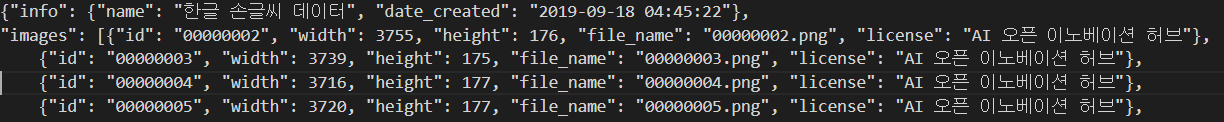

### 손글씨 데이터 파악

In [3]:
# 손글씨 데이터에서 필요한 것들 (for GAN) 
# text(클래스) : json_data['annotations'][idx]['text']
# 성별, 연령대 : json_data['annotations'][idx]['attributes']  for pretraining - 잘 쓴 손글씨(여성) => 나중에 보니까 다 여성임 -> 나눌 필요 없다.
# 이미지 크기 : json_data['images'][idx]['width'] 또는 ['height']
# 파일명 : json_data['images'][idx]['file_name']
import json

In [4]:
def getListOfHandWritingFileNames(listOfFemaleHandWritingFileNames, listOfMaleHandWritingFileNames):
    handwritingMetaFile_location = '/content/gdrive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/01.손글씨/handwriting_data_info1.json'
    printedMetaFile_location = '/content/gdrive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/02.인쇄체/printed_data_info.json'

    with open(handwritingMetaFile_location, 'r') as f:
        hw_json_data = json.load(f)

    hw_ClassToFileNames, hw_WordsToFileNames= {}, {}
    hw_syllableDataLength = 0

    for idx, img_data in enumerate(hw_json_data['images']):
        # idx 번째 이미지 데이터들에 대해 {클래스 : [파일명, 파일명, ...]}
        class_ = hw_json_data['annotations'][idx]['text']
        fileName = hw_json_data['images'][idx]['file_name']
        if len(class_) == 1:    
            # 한 글자인 경우만 ClassToFileNames에 넣기
            if class_ not in hw_ClassToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                hw_ClassToFileNames[class_] = [] # 빈 리스트 생성
            hw_ClassToFileNames[class_].append(fileName)
            hw_syllableDataLength += 1
            if hw_json_data['annotations'][1]['attributes']['gender'] == '여':
                listOfFemaleHandWritingFileNames.append(fileName)
            else:
                listOfMaleHandWritingFileNames.append(fileName)
        else:
            # 단어, 문장의 경우 WordsToFileNames에 넣기
            if class_ not in hw_WordsToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                hw_WordsToFileNames[class_] = [] # 빈 리스트 생성
            hw_WordsToFileNames[class_].append(fileName)
    
    print("*** Handwriting Data Description ***")
    print("\t전체 데이터 수 : ", len(hw_json_data['images']) )# 여기에는 문장 데이터, 단어 데이터, 음절 데이터 모두 포함됨
    print("\t음절 클래스 수 : ", len(hw_ClassToFileNames) ) # 한국어 글자 종류는 11,172가지.
    print("\t단어/문장 클래스 수: ", len(hw_WordsToFileNames))
    print("\t음절 데이터 수 : ", hw_syllableDataLength)
    print("\t단어/문장 데이터 수 : ", len(hw_json_data['images']) - hw_syllableDataLength)
    print(f"\t한 음절 당 평균 {hw_syllableDataLength/len(hw_ClassToFileNames)} 개 손글씨 데이터 존재함")

### 인쇄체 데이터 파악

In [5]:
def getListOfPrintedFileNames(listOfPrintedFileNames):
    printedMetaFile_location = '/content/gdrive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/02.인쇄체/printed_data_info.json'

    with open(printedMetaFile_location, 'r') as f:
        p_json_data = json.load(f)

    p_ClassToFileNames, p_WordsToFileNames= {}, {}
    p_FIleNameToClass = {} # 파일명 : json_data['images'][idx]['file_name']
    p_syllableDataLength = 0

    for idx, img_data in enumerate(p_json_data['images']):
        # idx 번째 이미지 데이터들에 대해 {클래스 : [파일명, 파일명, ...]}
        class_ = p_json_data['annotations'][idx]['text']
        fileName = p_json_data['images'][idx]['file_name']
        if len(class_) == 1:    
            # 한 글자인 경우만 ClassToFileNames에 넣기
            if class_ not in p_ClassToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                p_ClassToFileNames[class_] = [] # 빈 리스트 생성
            p_ClassToFileNames[class_].append(fileName)
            p_syllableDataLength += 1
            listOfPrintedFileNames.append(fileName)

        else:
            # 단어, 문장의 경우 WordsToFileNames에 넣기
            if class_ not in p_WordsToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                p_WordsToFileNames[class_] = [] # 빈 리스트 생성
            p_WordsToFileNames[class_].append(fileName)
    for idx, img_data in enumerate(p_json_data['images']):
        fileName = p_json_data['images'][idx]['file_name']
        class_ = p_json_data['annotations'][idx]['text']
        p_FIleNameToClass[fileName] = class_

    print("*** Printed Data Description ***")
    print("\t전체 데이터 수 : ", len(p_json_data['images']) )# 여기에는 문장 데이터, 단어 데이터, 음절 데이터 모두 포함됨
    print("\t음절 클래스 수 : ", len(p_ClassToFileNames) ) # 한국어 글자 종류는 11,172가지.
    print("\t단어/문장 클래스 수: ", len(p_WordsToFileNames))
    print("\t음절 데이터 수 : ", p_syllableDataLength)
    print("\t단어/문장 데이터 수 : ", len(p_json_data['images']) - p_syllableDataLength)
    print(f"\t한 음절 당 평균 {p_syllableDataLength/len(p_ClassToFileNames)} 개 손글씨 데이터 존재함")

    return p_ClassToFileNames, p_FIleNameToClass

## 인쇄체 데이터 파싱

In [7]:
# 인쇄체 음절 이미지의 파일명  for pretrain
listOfPrintedFileNames = []
# 여성 필기체 음절 이미지의 파일명  for pretrain
listOfFemaleHandWritingFileNames = []
# 남성 필기체 음절 이미지의 파일명  for train
listOfMaleHandWritingFileNames = []

# getListOfHandWritingFileNames(listOfFemaleHandWritingFileNames, listOfMaleHandWritingFileNames)
p_ClassToFileNames, p_FIleNameToClass = getListOfPrintedFileNames(listOfPrintedFileNames)

#print("여성 필기체 data 수 : ", len(listOfFemaleHandWritingFileNames))
#print("남성 필기체 data 수 : ", len(listOfMaleHandWritingFileNames))
print("인쇄체 data 수 : ", len(listOfPrintedFileNames))

*** Printed Data Description ***
	전체 데이터 수 :  878100
	음절 클래스 수 :  11172
	단어/문장 클래스 수:  6054
	음절 데이터 수 :  575350
	단어/문장 데이터 수 :  302750
	한 음절 당 평균 51.499283924095955 개 손글씨 데이터 존재함
인쇄체 data 수 :  575350


#### claassToFileName.pickle ( 자주 사용하는 한국어 + 어려운거 몇 개만 class로) 

In [8]:
import pandas as pd

classFile = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/한국어 학습용 어휘 목록.xls'
df = pd.read_excel(classFile)

df.head()

,순위,단어,품사,풀이,등급
0,1195.0,가게,명,NaN,A
1,898.0,가격03,명,價格,B
2,2986.0,가구03,명,家口,C
3,7434.0,가구04,명,家具,B
4,4964.0,가까워지다,동,NaN,B


In [9]:
word_list = df["단어"].tolist()
# word_list 수정,  '가구04', '도쿄(동경)' 가공
for idx, word in enumerate(word_list):
    if len(word) > 2:
        if word[-2] in ('0', '1', '2', '3'):
            word_list[idx] = word[:-2]
    if word[-1] == ')':
        del word_list[idx]
        
len(word_list)

5963

In [10]:
syllable_set = set()
for word in word_list:
    for syllable in word:
        syllable_set.add(syllable)
len(syllable_set)

dump_set = {'0', '1', '8'}

easy_syllable_set = syllable_set - dump_set
len(easy_syllable_set)

971

In [11]:
whole_syllable_set = set(p_ClassToFileNames.keys())
len(whole_syllable_set)

11172

In [12]:
difficult_syllable_set = whole_syllable_set - easy_syllable_set
len(difficult_syllable_set)

10201

In [13]:
import random

difficult_syllable_list = list(difficult_syllable_set)
classList = []

randIdx = random.randint(0, len(difficult_syllable_set))

difficult_syllable_choice = set()

for i in range(976):
    randIdx = random.randint(0, len(difficult_syllable_set))
    difficult_syllable_choice.add(randIdx)
len(difficult_syllable_choice)

idxs = list(difficult_syllable_choice)


difficult_syllable_classes = set()
for idx in idxs:
    difficult_syllable_classes.add(difficult_syllable_list[idx])
len(difficult_syllable_classes)

932

In [17]:
newClassToFileNames = {}
for syllable in difficult_syllable_classes:
    newClassToFileNames[syllable] = p_ClassToFileNames[syllable]

for syllable in easy_syllable_set:
    newClassToFileNames[syllable] = p_ClassToFileNames[syllable]

print("잘 쓰는 글자(971) : ", easy_syllable_set) # 국립국어연구원에서 2003년 5월에 발표한 한국어 학습용 어휘 목록에서 따옴
print("잘 안쓴느 글자(932) : ", difficult_syllable_classes) # 위의 꺼의 여집합 중 일부 ( 비율 거의 동일하게 함)
print("잘 쓰는 글자(971)와 잘 안쓰는 글자(932) 총 클래스 : ", len(newClassToFileNames))

잘 쓰는 글자(971) :  {'럴', '풀', '좋', '펼', '맥', '별', '널', '삿', '푹', '다', '밤', '찰', '없', '고', '툴', '쏘', '잇', '불', '씨', '혀', '홀', '댓', '설', '옮', '둘', '윽', '듣', '톨', '량', '뿐', '싹', '돗', '유', '숨', '끄', '찍', '덩', '엽', '샌', '론', '독', '둑', '빵', '누', '찬', '벌', '옛', '잃', '흑', '윗', '력', '엔', '북', '돈', '듬', '잘', '맘', '슷', '내', '챙', '화', '자', '주', '과', '돕', '각', '깝', '공', '블', '컨', '판', '까', '문', '볕', '앗', '루', '응', '작', '홍', '맙', '냇', '괴', '욕', '때', '꺾', '늬', '촬', '결', '엉', '바', '팀', '양', '춤', '달', '칸', '낯', '썰', '씩', '률', '껍', '사', '얘', '걸', '째', '삼', '쓸', '름', '출', '되', '균', '꾼', '볼', '철', '엄', '푸', '낮', '민', '너', '좌', '늦', '곁', '입', '땀', '골', '브', '쩜', '륙', '군', '묻', '취', '개', '츠', '갇', '욱', '슈', '펜', '모', '센', '걷', '뜻', '걱', '베', '섬', '백', '찻', '새', '볶', '감', '씻', '훨', '짙', '밝', '늙', '할', '쟁', '잊', '듭', '흐', '축', '것', '피', '즈', '빠', '회', '큼', '성', '들', '놔', '막', '깔', '율', '합', '씀', '변', '벨', '앙', '식', '접', '눈', '제', '방', '솟', '흔', '가', '걔', '향', '쁘', '스', '맞', '팬', '뤄', '계', '뻐', '곳', '범', '승', '섯'

In [ ]:
with open('/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/pClassToFileNames.pickle', 'wb') as fw:
    pickle.dump(newClassToFileNames, fw)

#### FileNameToClass.pickle - key를 한정 (기존 FileNameToClass는 11172개의 class 모두 담고 있음 => 1903개 클래스로 축소)

In [29]:
classes = newClassToFileNames.keys()
new_pFileNameToClass = dict()
for fileName in p_FIleNameToClass.keys():
    if p_FIleNameToClass[fileName] not in classes:
        continue
    new_pFileNameToClass[fileName] = p_FIleNameToClass[fileName]

print("클래스 축소 전 데이터 수 : ", len(p_FIleNameToClass))
print("클래스 축소 후 데이터 수 : ", len(new_pFileNameToClass)) # 줄여도 엄청 많네...

클래스 축소 전 데이터 수 :  878100
클래스 축소 후 데이터 수 :  111900


In [31]:
import pickle
with open('/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/pFileNameToClass.pickle','wb') as fw:
    pickle.dump(new_pFileNameToClass, fw)

#### 이미지 담긴 폴더에서 1903개 클래스에 해당하는 이미지 파일명만 저장하기 for dataLoader

In [38]:
import os

path = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/printed'
file_list = os.listdir(path)

# new_pFileNameToClass 는 1903개 클래스에 해당하는 image filename 들만 key 로 있음
newFileList = []
for filename in file_list:
    try: # new_pFileNameToClass 이용함 key 에러 뜨면 넘겨야 함
        new_pFileNameToClass[filename]
        newFileList.append(filename)
    except KeyError:
        # print(filename)
        pass
len(newFileList)

8244

In [39]:
import csv

filepath = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/fileName.csv'
with open(filepath, 'w', newline='') as f: 
    writer = csv.writer(f) 
    writer.writerow(newFileList)

## github 커밋

In [40]:
MY_GOOGLE_DRIVE_PATH = "/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital"
%cd "{MY_GOOGLE_DRIVE_PATH}"

/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital


In [19]:
!git config --global user.email dkwjd0824@khu.ac.kr  # 이메일 입력 ex) qhrqufdlek@naver.com
!git config --global user.name  hyeneung #깃헙 아이디 입력 ex)luckydipper
!git pull

Already up to date.


In [20]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	deleted:    GAN/EDA.ipynb
	modified:   GAN/WGAN_DIV.ipynb
	modified:   object_detection/test_data_generator.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	GAN/Parsing.ipynb
	object_detection/test_data/
	object_detection/test_data_generating_file/

no changes added to commit (use "git add" and/or "git commit -a")


In [21]:
!git add GAN/EDA.ipynb GAN/Parsing.ipynb

In [22]:
!git commit -m"[ADD] parsingCode"

[main 99409be] [ADD] parsingCode
 2 files changed, 1 insertion(+), 1 deletion(-)
 delete mode 100644 GAN/EDA.ipynb
 create mode 100644 GAN/Parsing.ipynb


In [23]:
!git push

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 35.05 KiB | 5.84 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/PILGI-Analog-To-Digital/Analog-PILGI-to-DIgital.git
   70556cf..99409be  main -> main
